# Perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt

As the **neuron** is the most fundamental unit of the brain, the **perceptron** can be considered the most fundamental unit of a deep neural network. Both the neuron and the perceptron, also called *artificial neuron*, take an input, process it, pass it through an activation function that returns the activated output. 



![image](https://miro.medium.com/max/700/1*Fyapb-JRFJ-VtnLYLLXCwg.png)
The Perceptron model is like the one showed in the image: first you have several inputs ($x_{1}, x_{2}, ..., x_{n}$). You can think of them like the features of the data you have worked on till now. Do you remember the *wonderful features* of the build week you worked on without knowing what they stand for? Those anonymous columns? Yes, like those.

You investigated them trying to see the "importance" of each one using the correlation with the target, or the *shap* values. 
Well, a neuron try to figure out the importance of each input feature by itself. How?

Look at those $w_{1}, w_{2},..., w_{n}$: they are the *weigths* that are associated with each input entry. As you can see on the right part of the picture, each $x_{i}$ is multiplied by the corresponding $w_{i}$ and then summed together. Those weights are not there to indicate the "importance" of each input feature, but instead the goal is to build a binary classifier, as you can expect from the 0 and 1 in the picture above. 

Ok, restart. The goal of a perceptron is to build a binary classifier, meaning a classifier that outputs either 0 or 1. In the case of a neuron, it "spikes" electricity through the axons, or doesn't. 

For this reason, the $w_{i}$s are the weights, either positive or negative, such that the weighted sum $\sum_{i}w_{i}\cdot x_{i}$ gives either 0 or 1. What does $b$ stand for? As you can expect, it's the bias component that you are used to already.

I'll give you another example. Think that you want to decide either to watch a specific movie or not. You could have some "features" that you may consider before taking the decision. Let's say they are three:
- $x_{1}$ is the feature: isAvengersMovie
- $x_{2}$ is the feature: isRomanticMovie
- $x_{3}$ is the feature: theMovieWonAnOscar

What about the *bias*? Well, maybe a movie freak would watch all the movies he could, a more selective one would watch only Avengers movies. But at the end of the day, the weights and the bias will depend on the data. 

Ok, now let's assume that I'm that kind of guy who watches all the Avengers movies and hates romantic movies unless they won an Oscar.
(It's not my case, I don't watch romantic movies as all... Ok, only when my gf forces me.).

I chose binary variables for the sake of the example, but they can be any. 

Our training set looks like the following:
- "Titanic", 1
- "Avengers: Endgame", 1
- "I still believe", 0
- "Spiderman", 1

Test set:
- "Chocolat", 1

where 1 stands for "watched", and 0 for "not watched". What we want to predict is if I will watch or not the movie "Chocolat".

Let's represent the movies with the features above:

|       title        | isAvengersMovie | isRomanticMovie | theMovieWonAnOscar | watched |
|--------------------|-----------------|-----------------|--------------------|---------|
| "Titanic"          | 0               | 1               | 1                  | 1       |
| "Avengers: Endgame"| 1               | 0               | 0                  | 1       |
| "I still believe"  | 0               | 1               | 0                  | 0       |
| "Spiderman"        | 1               | 0               | 0                  | 1       |
| "Chocolat"         | 0               | 1               | 1                  | 1       |

Now the Machine Learning Scientist has to set the weights $w_{1}, w_{2}, w_{3}$. How would he start? One way, is to start randomly:

In [2]:
np.random.seed(42)
w1, w2, w3 = np.random.rand(3)
print(w1, w2, w3)

0.3745401188473625 0.9507143064099162 0.7319939418114051


I will change the sign and the scale of $w_{2}$ to have a more interesting example:

In [3]:
w2 = -2*w2

while the vectors of features will be:

In [4]:
x1 = np.array([0, 1, 0, 1])
x2 = np.array([1, 0, 1, 0])
x3 = np.array([1, 0, 0, 0])

and the target:

In [5]:
y = np.array([1, 1, 0, 1])

For the test (the movie "Chocolat"):

In [6]:
x1_test = 0
x2_test = 1
x3_test = 1

What's missing? The bias $b$!


In [7]:
np.random.seed(42)
b = np.random.rand(1)[0]
print(b)

0.3745401188473625


Here we go. So let's start from the first sample, the "Titanic" movie. We have to compute:

$x_{1}\cdot w_{1} + x_{2}\cdot w_{2} +  x_{3}\cdot w_{3} + b$ 

Approximating $w_{1}, w_{2}, w_{3}, b$ to the third significant figure, and remembering that $x_{1} = 0, x_{2} = 1, x_{3}=1$, we have:
$0.374\cdot 0 - 1.901 \cdot 1 + 0.732\cdot 1 + 0.374 = - 0.795$.

Now what? The result is neither 0 or 1! This is why we need an *activation function*! An activation function determines whether the neuron should be activated (“fired”) or not, based on whether each neuron's input is relevant for the model's prediction. The most *basic* activation function you can think of is the one that gives you 1 in case of a positive outcome, 0 for 0 or negative one. In mathematical terms, if $g(\mathbf{x})$ is the activation function given the input vector $\mathbf{x}=(x_{1},x_{2}, x_{3})$

$$ g(\mathbf{x})=\begin{cases}
          1, & \text{if}\ \mathbf{wx}+\mathbf{b}>0 \\
          0, & \text{otherwise}
            \end{cases}
$$

I used another notation here, just to make you flexible for different book notations. In some books, to distinguish scalars from vectors (*i.e.* simple numbers like 1, 1.5, -1 from (2, 1, 3.6)) it is used the bold for vectors. I recall you that $\mathbf{wx}$ is the *dot product* between $\mathbf{w}$ and $\mathbf{x}$!

Ok cool, what about the output of our algorithm for the "Titanic"? Since the output of $0.374\cdot 0 - 1.901 \cdot 1 + 0.732\cdot 1 + 0.374 = - 0.795$ is negative, the activation function $g$ will make it 0.

Oh, but this is a wrong prediction! We should adjust our weights!


To recap:

- we randomly initialised the weights $\mathbf{w}$ and the bias $\mathbf{b}$
- we used them to compute a value
- we "activated" the value with the activation function $g$
- we got the *wrong* prediction :(

We learn from mistakes, right?

Let me introduce you to the... Perceptron Learning Rule!
Since the prediction was 0 instead of 1.
What we wished for, was the dot product $\mathbf{wx}$ to be higher than 0, because in this way the activation function would have returned 1! Since we got a negative value, we need to edit the weights a bit so that we are more likely to get a positive value for classifying this example and get the right score. 

Is it clear? I'll say it again: we predicted 0 instead of 1. We predicted 0 because $\mathbf{wx}=-0.795$ and the activation function $g$ states that we say "0" if $\mathbf{wx}$ is negative, so this is the case. If we want a positive outcome from $\mathbf{wx}$, then we should increase a bit that value. How can we? We decided the old weights just randomly picking them, so can adjust them such that $\mathbf{wx}$ for the "Titanic" example will be higher!

Unpacking the dot product $\mathbf{wx}$ for each component:

- $w_{1}\cdot x_{1}$ 
- $w_{2}\cdot x_{2}$
- $w_{2}\cdot x_{3}$

Since the $x_{i}$ are "fixed", they are given from the dataset, we can increase the $w_{i}$ like:

$$w_{i(new)} = w_{i(old)} + (y-\hat{y})x_{i}$$

In this way: if we have no error, it means that $(y-\hat{y})=0$, so we don't make any update. If we predicted 0 and the label was 1, then we have $1-0=1$ and $w_{i(new)}$ would become $w_{i(old)}+x_{i}$. If we predicted 1 and the label was 0, then $0-1= -1$ and $w_{i(new)}$ would become $w_{i(old)}-x_{i}$.

In our example:

- $w_{1(new)} = 0.374 + 0 = 0.374$
- $w_{2(new)} = -1.901 + 1 = -0.901$
- $w_{2(new)} = 0.732 + 1 = 1.732$
- $b_{(new)} = 0.374 + 1 = 1.374$

If we try the prediction again:

$0.374\cdot 0 - 0.901 \cdot 1 + 1.732\cdot 1 + 1.374 = 2.749$.

*N.B.* To learn the bias as well, we add another component to the input and we consider it as 1. This i why you see "+ 1" in $b_{(new)} = 0.374 + 1 = 1.374$!


In [8]:
w1 += x1[0]
w2 += x2[0]
w3 += x3[0]
b += 1

In [9]:
w1*x1[0]+w2*x2[0]+w3*x3[0]+b

2.2051054478389354

We got a positive score this time. However, there's something more to point out. Learning in this way, will require a very big update of the weights at each iteration! This is why we introduce the:

**Learning rate**

that is the step size of the update for each iteration! The smaller the learning rate, the higher the number of iterations your algorithm will do, the bigger, the faster, but less accurate. If it is too big, sometimes you could overshoot too much.

In this way, the update rule will be:

$$w_{i(new)} = w_{i(old)} + \eta(y-\hat{y})x_{i}$$

where $\eta$ is the learning rate. 

What do we do with the rest of the samples? The idea is that we make a prediction for the first sample and update the weights, then with the second and we update the weights and then we restart from the first sample till we have classified correctly all the training set! Then, we are ready to test it on the test set!

To recap the algorithm:

while not all the samples are correctly classified do:

   - pick random $x\in$ *TrainingSamples*
     
   - if $\mathbf{wx}>0$ and the label of $x$ is 0 or viceversa:
   
       - update weights

     

Questions that you could have so far:

1. What if it takes thousands of iterations to converge?

Set a max iteration parameter to stop early. This allows you to avoid overfitting as well.

2. What if the data are not linearly separable?

Good point. Since we used a linear activation function, the algorithm converges only if there are linearly separable data. In the example below the algorithm would not converge 👇

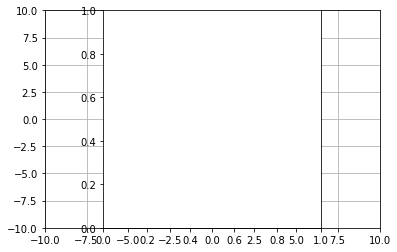

In [10]:
from sklearn.datasets import make_circles, make_moons
X_circle, y_circle = make_circles(100) # or try make_moons(100)
y_circle = y_circle * 2 - 1
X_circle*=4  # Make it a bit larger
plt.scatter(X_circle[:,0], X_circle[:,1], c=y_circle, edgecolor='none')
plt.xlim([-10,10]); plt.ylim([-10,10]); plt.grid()
plt.axes().set_aspect('equal')


3. How can we choose the learning rate?

You can try different ones. Common choices are 0.1, 0.01.


4. Could we see some code? 

Yes sure.

We need:

- labeled input data
- a learning rate
- some weights


In [11]:
eta = 0.1
input_data = [(np.array([0, 1, 1]), 1), (np.array([1, 0, 0]), 1),
              (np.array([0, 1, 0]), 0), (np.array([1, 0, 0]), 1), 
              (np.array([0, 1, 1]), 1)]
train = input_data[:-1]
test = input_data[-1]
weights = np.zeros(3)
bias = 0
max_iter = 10

def perceptron(train, weights, bias, eta, max_iter):
    it = 0
    while it < max_iter: 
        new_weights = weights
        new_bias = bias
        for sample in train:
            output = np.dot(weights, sample[0]) + bias 
            if output <= 0:
                output = 0
            else:
                output = 1
            if (sample[1] - output) != 0:
                
                weights += eta*(sample[1] - output)*sample[0]
                bias += eta*(sample[1] - output)
        if new_weights.all() == weights.all() and new_bias == bias:
            print(f"Convergence achieved at iteration {it}")
            break
        it += 1
        
    return weights, bias

In [12]:
weights, bias = perceptron(train, weights, bias, eta, max_iter)

Convergence achieved at iteration 2


Testing it one the test data:

In [13]:
np.dot(weights, test[0])+bias

0.1

that is positive, so it will be classified as 1.
What about the rest in the training set?

In [14]:
train_titles = ["Titanic", "Avengers: Endgame", "I still believe", "Spiderman"]
for i, sample in enumerate(train):
    output = np.dot(weights, sample[0]) + bias
    print(train_titles[i], "predicted:", int(output>0), "true label:", sample[1])

Titanic predicted: 1 true label: 1
Avengers: Endgame predicted: 1 true label: 1
I still believe predicted: 0 true label: 0
Spiderman predicted: 1 true label: 1


That is correct for all of them!

What about non-linearly separable data? A classical example where the perceptron fails to converge to a solution that correctly classifies all the training data is the XOR problem.

You know that the table truth of the XOR is:

| A | B | A xor B |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

That is "XOR is true if and only if ONLY one of the two statements is true".

![image](https://miro.medium.com/max/1400/1*E7YhKsJ2wb-VdeXpg89lvg.png)


As you can see in the picture, solving the equations for all the cases lead to an impossible solution:

- Since $w_{0}$ is negative ($w_{0}<0$) it means that $-w_{0}$ is positive.
- the 2nd and the 3rd lines says that both $w2$ and $w1$ are bigger than $-w_{0}$, so they are bigger than a positive number $\rightarrow$ they are both positive
- the sum of two positive number is obviously greater than the individuals (say 5+4 >5 and >4). So, the sum $w_{1}+w_{2}$ must be greater than $w_{1}$ and greater than $w_{2}$, and both should be greater than $-w_{0}$: the last row is a contraddiction with the 2nd and the 3rd!

Let' test it with code!

In [15]:
xor = [(np.array([0,0]),0), (np.array([0,1]),1), (np.array([1,0]),1), (np.array([1,1]),0)]

In [16]:
w_xor, b_xor = perceptron(xor, np.random.rand(2), bias=0, eta=0.1, max_iter=1000)

Convergence achieved at iteration 1


In [17]:
for i, sample in enumerate(xor):
    output = np.dot(w_xor, sample[0]) + b_xor
    print("predicted:", int(output>0), "true label:", sample[1])

predicted: 0 true label: 0
predicted: 1 true label: 1
predicted: 0 true label: 1
predicted: 1 true label: 0


As you can see, two of them have been misclassified!

## Improve the activation function

Till now we have used the step function $$ g(\mathbf{x})=\begin{cases}
          1, & \text{if}\ \mathbf{wx}+\mathbf{b}>0 \\
          0, & \text{otherwise}
            \end{cases}
$$
as activation function. Can we do better?



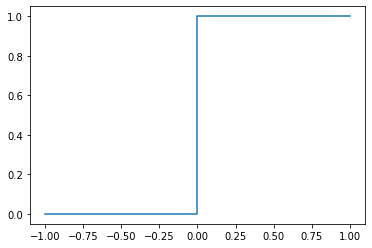

In [18]:
plt.step([-1, 0,1], [0, 0,1])

As you can see in the picture above, we have a jump at 0. However, you may expect not so big difference between -0.001 and 0.001! As we did for the Logistic Regression, we may use the *sigmoid* or *logistic function* as activation function to have a smoother behaviour:

![image](https://miro.medium.com/max/1400/1*QLtPF0YkwYRLVoSeh2w4gw.png)

In this way, the output won't be either 0 or 1, but the probability (because we have a continuous number between 0 and 1) of 0 or 1!

Let's implement the perceptron again but using the sigmoid this time:

In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def perceptron_with_sigmoid(train, weights, bias, eta, max_iter):
    it = 0
    while it < max_iter: 
        new_weights = weights
        new_bias = bias
        for sample in train:
            output = np.dot(weights, sample[0]) + bias 
            ## I comment the old activation function
            # if output <= 0:
            #     output = 0
            # else:
            #     output = 1
            ## New activation function
            output = sigmoid(output)
            if (sample[1] - output) != 0:
                
                weights += eta*(sample[1] - output)*sample[0]
                bias += eta*(sample[1] - output)
        if new_weights.all() == weights.all() and new_bias == bias:
            print(f"Convergence achieved at iteration {it}")
            break
        it += 1
        
    return weights, bias



You will see later why that having such a smooth and differentiable function helps neural network for computing the gradient of the loss function! 

## Conclusions

We have seen the Perceptron algorithm, that is an algorithm to build a binary classifier for linearly separable data. We succesfully tested it on an example movies dataset, and unsuccesfully for the XOR problem, that contains not-linearly separable data. 

We learned that the Perceptron is for an artificial neural network what a neuron is for a biological one. We defined the sigmoid, a smooth and differentiable activation function that is often used in neural networks (you will meet cooler activation functions by the way!).

For questions, feel free to ask! You can comment on Deepnote at this link: https://deepnote.com/project/59d3fdb3-682e-49b5-8cd1-f908f9765253